In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---
# Data Loading

In [2]:
def convert(df):
    df = df.map({
        'negative': 0,
        'neutral': 1,
        'positive': 2
    })
    return df

In [3]:
df_train = pd.read_csv('/kaggle/input/synthetic-vietnamese-students-feedback-corpus/synthetic_train.csv')
df_test = pd.read_csv('/kaggle/input/synthetic-vietnamese-students-feedback-corpus/synthetic_val.csv')

df_train['sentiment'] = convert(df_train['sentiment'])
df_test['sentiment'] = convert(df_test['sentiment'])

In [4]:
df_train

,sentence,sentiment,topic
0,Đội ngũ bảo trì quá thưa thớt dẫn đến không đả...,0,facility
1,The university's musical and artistic faciliti...,1,facility
2,Phương pháp giảng dạy phù hợp với các đối tượn...,1,curriculum
3,Chương trình học giúp tôi trở thành một chuyên...,2,curriculum
4,Tôi nghĩ rằng chương trình đào tạo có thể có t...,1,curriculum
...,...,...,...
8139,Hệ thống an ninh trong trường rất tốt và đảm b...,1,facility
8140,Cô giáo đã giúp tôi hiểu rõ hơn về môn học này.,1,others
8141,Anh/chị đã trở thành một người bạn đồng hành v...,2,others
8142,Chương trình học phù hợp với nhu cầu của các n...,1,curriculum


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8144 entries, 0 to 8143
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentence   8144 non-null   object
 1   sentiment  8144 non-null   int64 
 2   topic      8144 non-null   object
dtypes: int64(1), object(2)
memory usage: 191.0+ KB


---
# Data Preprocessing

In [6]:
import re
import string

def preprocess(text):
    text = text.lower()  # chuyển về chữ thường
    text = re.sub(r'\d+', '', text)  # xóa số
    text = re.sub(rf"[{string.punctuation}]", '', text)  # xóa dấu câu
    text = text.strip()  # xóa khoảng trắng đầu cuối
    return text  # trả về văn bản đã làm sạch (tách từ bằng dấu cách)


In [7]:
# Áp dụng hàm preprocess
df_train['clean_text'] = df_train['sentence'].apply(preprocess)
df_test['clean_text'] = df_test['sentence'].apply(preprocess)


In [8]:
df_train['clean_text']

0       đội ngũ bảo trì quá thưa thớt dẫn đến không đả...
1       the universitys musical and artistic facilitie...
2       phương pháp giảng dạy phù hợp với các đối tượn...
3       chương trình học giúp tôi trở thành một chuyên...
4       tôi nghĩ rằng chương trình đào tạo có thể có t...
                              ...                        
8139    hệ thống an ninh trong trường rất tốt và đảm b...
8140       cô giáo đã giúp tôi hiểu rõ hơn về môn học này
8141    anhchị đã trở thành một người bạn đồng hành vô...
8142    chương trình học phù hợp với nhu cầu của các n...
8143    tôi cần chuyển sang học tại đại học khác để đá...
Name: clean_text, Length: 8144, dtype: object

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)  # hoặc bỏ max_features để lấy hết
X_train = vectorizer.fit_transform(df_train['clean_text'])
X_test = vectorizer.transform(df_test['clean_text'])

y_train = df_train['sentiment']
y_test = df_test['sentiment']


In [10]:
feature_names = vectorizer.get_feature_names_out()

# Chuyển sparse matrix thành DataFrame
X_train = pd.DataFrame(X_train.toarray(), columns=feature_names)
X_test = pd.DataFrame(X_test.toarray(), columns=feature_names)

In [11]:
X_test

,about,academic,access,accessibility,accessible,accommodate,accommodating,achieve,across,active,...,ẩn,ỏi,ồn,ổn,ụy,ủi,ủng,ức,ứng,ửng
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
def plot_cm(model, y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)

    labels = model.classes_
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def train_rf(X_train, X_test, y_train, y_test):
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    plot_cm(model, y_test, y_pred, 'RandomForestClassifier')
    return model


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.94       686
           1       0.77      0.70      0.73       670
           2       0.77      0.78      0.78       680

    accuracy                           0.82      2036
   macro avg       0.81      0.82      0.82      2036
weighted avg       0.82      0.82      0.82      2036



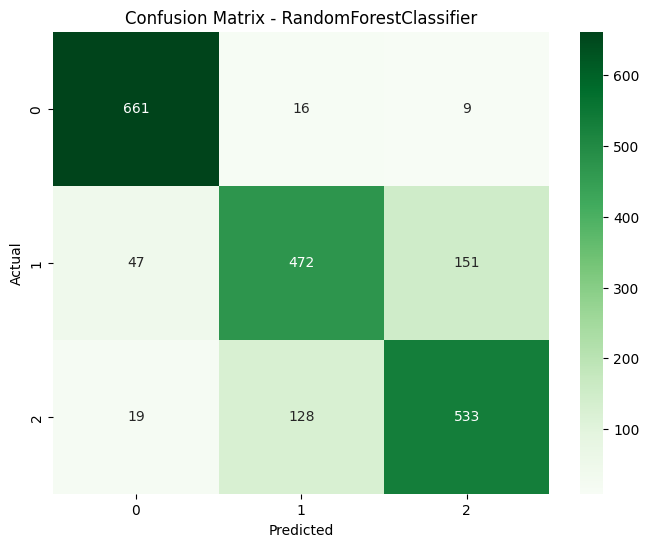

In [14]:
rf_model = train_rf(X_train, X_test, y_train, y_test)

In [15]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def train_svm(X_train, X_test, y_train, y_test):
    model = SVC(kernel='linear', probability=True, random_state=42)  # Có thể đổi kernel
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    plot_cm(model, y_test, y_pred, 'SVM')
    return model


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       686
           1       0.73      0.74      0.74       670
           2       0.77      0.74      0.75       680

    accuracy                           0.81      2036
   macro avg       0.81      0.81      0.81      2036
weighted avg       0.81      0.81      0.81      2036



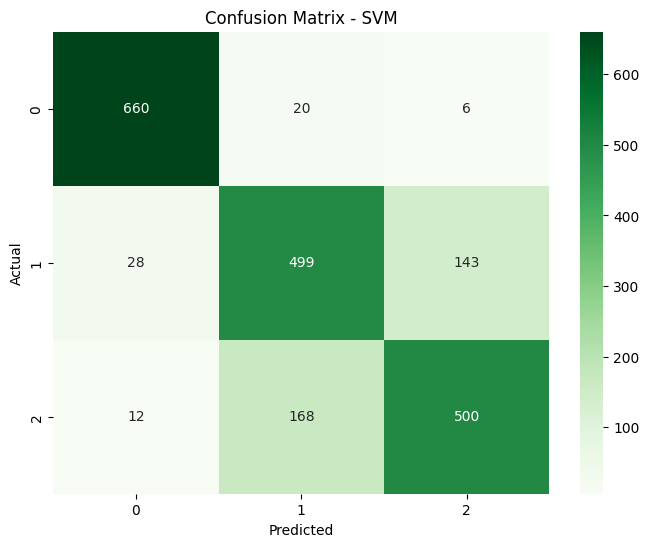

In [16]:
svm_model = train_svm(X_train, X_test, y_train, y_test)

In [17]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def train_xgboost(X_train, X_test, y_train, y_test):
    num_classes = len(set(y_train))  # Số lớp

    model = XGBClassifier(
        objective='multi:softprob',
        num_class=num_classes,
        use_label_encoder=False,
        eval_metric='mlogloss',
        random_state=42
    )

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    
    plot_cm(model, y_test, y_pred, 'XGBoost')
    return model


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       686
           1       0.76      0.77      0.77       670
           2       0.80      0.78      0.79       680

    accuracy                           0.84      2036
   macro avg       0.84      0.84      0.84      2036
weighted avg       0.84      0.84      0.84      2036



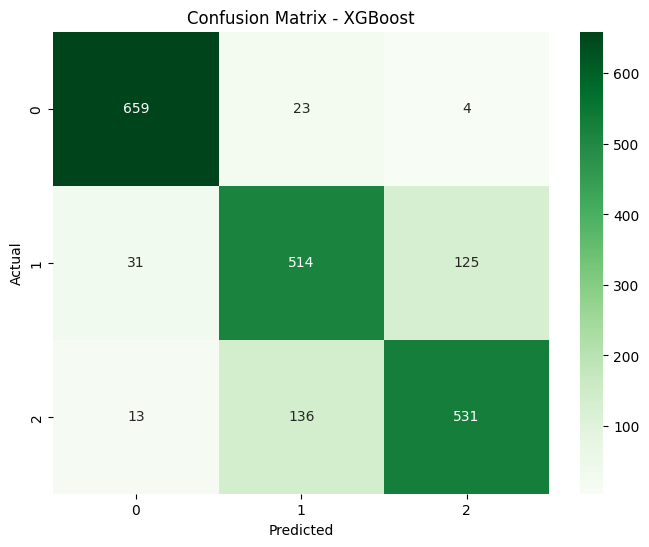

In [18]:
xgb_model = train_xgboost(X_train, X_test, y_train, y_test)

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def train_nn(X_train, X_test, y_train, y_test, num_classes):
    # Xây dựng mô hình
    model = Sequential()
    model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))  # softmax cho multi-class classification

    # Compile mô hình
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',  # Nếu y là số nguyên (0,1,2..)
                  metrics=['accuracy'])

    # Huấn luyện mô hình
    history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test), verbose=1)

    # Dự đoán
    y_pred = model.predict(X_test)
    y_pred_classes = y_pred.argmax(axis=1)

    # Đánh giá
    print("Accuracy:", accuracy_score(y_test, y_pred_classes))
    print("\nClassification Report:\n", classification_report(y_test, y_pred_classes))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_classes)
    labels = list(range(num_classes))

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix - Neural Network')
    plt.show()

    return model


2025-04-29 00:43:04.482161: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745887384.802537      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745887384.886702      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1745887398.760467      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1745887398.761088      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Epoch 1/20


I0000 00:00:1745887401.670924      64 service.cc:148] XLA service 0x7d5f100042a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745887401.671730      64 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1745887401.671751      64 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1745887401.882956      64 cuda_dnn.cc:529] Loaded cuDNN version 90300


115/509 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5266 - loss: 1.0213

I0000 00:00:1745887402.825743      64 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


509/509 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6633 - loss: 0.7508 - val_accuracy: 0.8040 - val_loss: 0.4468
Epoch 2/20
509/509 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8378 - loss: 0.3629 - val_accuracy: 0.8026 - val_loss: 0.4500
Epoch 3/20
509/509 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8715 - loss: 0.2953 - val_accuracy: 0.8001 - val_loss: 0.4586
Epoch 4/20
509/509 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9059 - loss: 0.2293 - val_accuracy: 0.7967 - val_loss: 0.5094
Epoch 5/20
509/509 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9475 - loss: 0.1470 - val_accuracy: 0.8065 - val_loss: 0.5464
Epoch 6/20
509/509 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9735 - loss: 0.0811 - val_accuracy: 0.7962 - val_loss: 0.6606
Epoch 7/20
509/509 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9890 - loss: 0.0421 - val_accuracy: 0.7937 - val_loss: 0.7365
Epoch 8/20
509/509 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9935 - loss: 0.0260 - val_accuracy: 0.7932 - val_

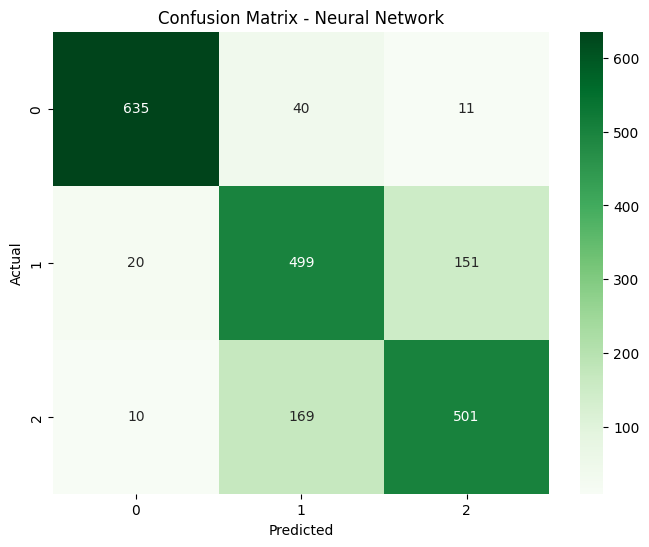

In [20]:
NN_model = train_nn(X_train, X_test, y_train, y_test, len(y_train.unique()))